In [ ]:
import tensorflow as tf
import os
import numpy as np
from google.colab import drive
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = r'/content/drive/MyDrive/Animal Classification/dataset'

In [ ]:
os.listdir(data)

['Giraffe',
 'Horse',
 'Elephant',
 'Panda',
 'Lion',
 'Kangaroo',
 'Dolphin',
 'Tiger',
 'Zebra',
 'Bird',
 'Dog',
 'Cow',
 'Cat',
 'Deer',
 'Bear']

In [ ]:
full_ds = tf.keras.utils.image_dataset_from_directory(data)

Found 1964 files belonging to 15 classes.


In [ ]:
train_size = int(0.7* len(full_ds))
val_size = int(0.2 * len(full_ds))
test_size = len(full_ds) - train_size - val_size

In [ ]:
train_ds = full_ds.take(train_size)
val_ds = full_ds.skip(train_size).take(val_size)
test_ds = full_ds.skip(train_size + val_size)

In [ ]:
def normalize(image, label):
    image = tf.cast(image,tf.float32)/255.0
    return image, label

In [ ]:
train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)
test_ds = test_ds.map(normalize)

In [ ]:
autotune = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = autotune)
val_ds = val_ds.cache().prefetch(buffer_size = autotune)
test_ds = test_ds.cache().prefetch(buffer_size = autotune)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),1,padding='same',activation='relu',input_shape = (256, 256, 3)),
    layers.MaxPooling2D(3,3),

    layers.Conv2D(64,(3,3),1,padding='same',activation='relu'),
    layers.MaxPooling2D(3,3),
    layers.Dropout(0.2)

    layers.Conv2D(128,(3,3),1,padding='same',activation='relu'),
    layers.MaxPooling2D(3,3),
    lwyers.Dropout(0.5)

    layers.Flatten(),

    layers.Dense(512,activation='relu'),
    layers.Dense(15,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.1225 - loss: 2.6715 - val_accuracy: 0.2604 - val_loss: 2.3503
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.3112 - loss: 2.1932 - val_accuracy: 0.3672 - val_loss: 1.9398
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.5052 - loss: 1.6140 - val_accuracy: 0.5000 - val_loss: 1.6064
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.6289 - loss: 1.2432 - val_accuracy: 0.6745 - val_loss: 1.2482
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.7763 - loss: 0.7679 - val_accuracy: 0.6458 - val_loss: 1.3621
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.8707 - loss: 0.4415 - val_accuracy: 0.7448 - val_loss: 1.2782
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9138 - loss: 0.3163 - val_accuracy: 0.7812 - val_loss: 1.2563
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9388 - loss: 0.2385 - val_accuracy: 0.7812 - v

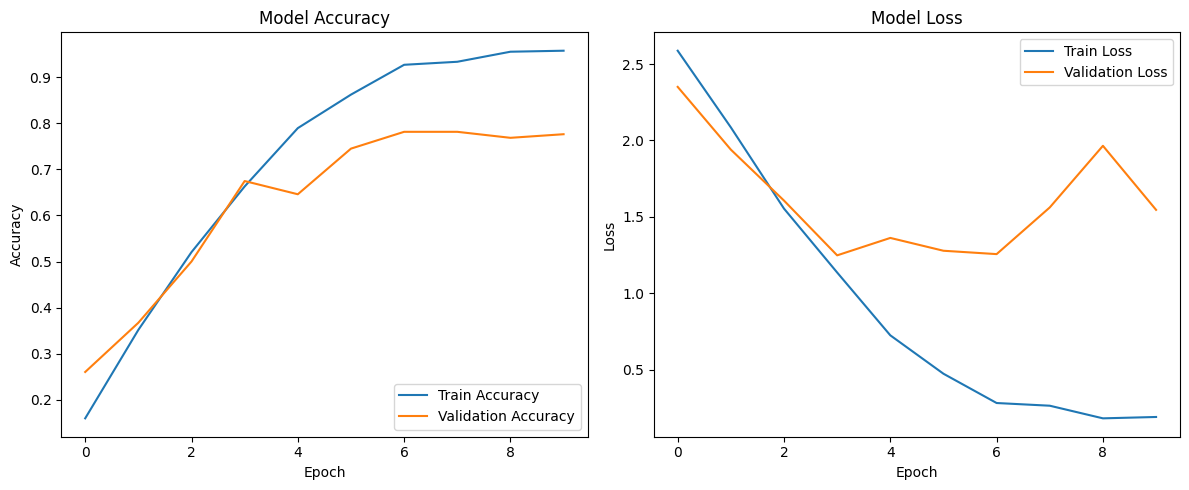

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy:{test_acc:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7775 - loss: 1.3590
Test accuracy:0.7794


In [ ]:
model.save('my_trained_model.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('my_trained_model.h5')

class_names = [
'Giraffe',
 'Horse',
 'Elephant',
 'Panda',
 'Lion',
 'Kangaroo',
 'Dolphin',
 'Tiger',
 'Zebra',
 'Bird',
 'Dog',
 'Cow',
 'Cat',
 'Deer',
 'Bear'
]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: Deer
Confidence: 1.00


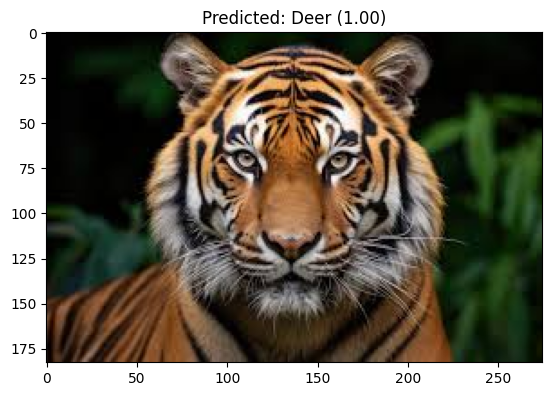

In [ ]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_idx]
    return predicted_class_name, predictions[0][predicted_class_idx]

image_path = r'/content/tiger1.jpg'
predicted_class, confidence = predict_image(image_path)

print(f'Predicted Class: {predicted_class}')
print(f'Confidence: {confidence:.2f}')

img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class} ({confidence:.2f})')
plt.show()